In [146]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [147]:
data = pd.read_csv('dataset_NN.csv')
data.shape

(2000, 7)

In [148]:
#normalize the dataset
col_names = np.array(data.columns)
col_names = col_names[:-1]
for i in col_names:
    col = np.array(data[i])
    norm = []
    std = np.std(col)
    mean = np.mean(col)
    for j in col:
        norm.append((j-mean)/std)
    data[i] = norm

In [149]:
#shuffling the data
data_shuffle = data.sample(frac=1)
data_shuffle

,att1,att2,att3,att4,att5,att6,class
819,0.763401,1.109311,3.268371,-0.382144,-0.309680,-0.320259,5
186,0.763401,-1.518350,-1.019892,-0.849553,-1.213369,-1.193655,1
1720,2.267639,-1.518350,1.838950,-1.111514,-1.015239,-1.123670,9
1905,0.763401,-0.642463,0.409529,-0.507205,-0.914906,-0.589416,10
336,-0.740837,1.109311,0.409529,-0.549198,-0.960044,-0.670544,2
...,...,...,...,...,...,...,...
79,0.763401,-1.518350,-1.019892,-1.298726,-1.374405,-1.203324,1
1219,0.763401,-0.642463,0.409529,-0.155578,-0.609222,-0.419264,7
1683,2.267639,-1.518350,1.838950,-0.926582,-0.993393,-1.068692,9
600,-0.740837,1.109311,0.409529,0.544317,0.368031,0.511729,4


In [150]:
#splitting the dataset into training data and testing data
data_train = data_shuffle.iloc[:math.floor(0.7*data.shape[0])]
data_test = data_shuffle.iloc[math.ceil(0.7*data.shape[0]):]
x_train = np.array(data_train.iloc[:,:-1])
y_train = np.array(data_train.iloc[:,-1])
x_test = np.array(data_test.iloc[:,:-1])
y_test = np.array(data_test.iloc[:,-1])

## Single Hidden Layer Artificial Neural Network

In [151]:
#sigmoid activation function
def sigmoid(Z):
    return 1/(1+np.exp(-1*Z))

In [152]:
def sigmoid_derivative(Z):
    return sigmoid(Z)*(1-sigmoid(Z))

In [155]:
#training algo using stochastic gradient
def stochastic_GD_single(X,Y,learning_rate,epochs,hidden_units):
    y_org = Y
    
    #one hot encoding
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    Y = one_hot_Y[:,1:]
    #random weight initialization
    # 6 input units
    W1 = np.random.randn(hidden_units,6) 
    b1 = np.random.randn(1,hidden_units)
    # 10 output units
    W = np.random.randn(10,hidden_units) 
    b = np.random.randn(1,10) 

    error_50iteration = list()
    accuracy_50iteration = list()

    for i in range(epochs):
    #generate a random point
        Xp = list()
        Yp = list()
        random_n = random.randint(0,X.shape[0]-1)
        Xp.append(X[random_n])
        Yp.append(Y[random_n])
        #convert into numpy array
        #Xp -> [1,6]
        Xp = np.array(Xp)
        #Yp -> [1,10]
        Yp = np.array(Yp)

        #forward propogation
        #affine transformation of base features
        Z1 = Xp.dot(W1.T) + b1 
        #activation function
        A1 = sigmoid(Z1) 
        Z2 = A1.dot(W.T) + b 
        A2 = sigmoid(Z2) 

        #backward propagation
        #db -> [1,10]
        db = (-1)*(Yp/A2)*(sigmoid_derivative(Z2)) + ((1-Yp)/(1-A2))*(sigmoid_derivative(Z2)) 
        #dW -> [10,8]
        dW = db.T.dot(A1)
        #db1 -> [1,8]
        db1 = (db.dot(W))*sigmoid_derivative(Z1)
        #dw1 -> [8,6]
        dW1 = (db1.T).dot(Xp)

        #updating weights
        W1 = W1 - (learning_rate)*(dW1)
        b1 = b1 - (learning_rate)*(db1)
        W = W - (learning_rate)*(dW)
        b = b - (learning_rate)*(db)

        #error and accuracy every 50 interval
        #calculating error
        error = (-1*Yp).dot(np.log(A2.T)) - (1-Yp).dot(np.log(1-A2.T))

        #calculating accuracy
        pred_one_hot_Y = sigmoid(((sigmoid((X.dot(W1.T)) + b1)).dot(W.T)) + b)
        y_pred = list()
        for row in range(pred_one_hot_Y.shape[0]):
            threshold = 0
            highest_column = 0
            for column in range(pred_one_hot_Y.shape[1]):
                if(pred_one_hot_Y[row][column] > threshold):
                    threshold = pred_one_hot_Y[row][column]
                    highest_column = column
            y_pred.append(highest_column + 1)
        correct = 0
        for k in range(len(y_org)):
            if y_org[k] == y_pred[k]:
                correct = correct + 1
        accuracy = correct / len(y_org)

        if(i%50 == 0):
            error_50iteration.append(error)
            accuracy_50iteration.append(accuracy)

    return W1,b1,W,b,error_50iteration,accuracy_50iteration,y_pred


In [156]:
alpha = [0.5, 0.1, 0.01]

For learning rate = 0.5
Output Layer Weights :
 [[-5.68849461  1.20765057 -4.31684229 -1.9754363  -0.75962152  8.12817657
   3.49492029 -7.16362995]
 [-3.61709885  7.45195065 -0.1821855   4.08923143 -0.7918454  -6.96478552
  -1.4044239  -5.08817496]
 [ 1.36338416 -2.76309877 -5.31002919 -1.80513877 -0.18234404  0.72557266
  -2.48442492 -1.85649246]
 [-1.07050536 -6.91445541 -0.14507275 -1.52008218 -0.66289792 -3.95387241
  -2.25489697  1.79117067]
 [-3.19284722 -3.21632291  1.64362805  4.35101431 -2.87691709 -4.52514385
  -4.96113655 -0.93277839]
 [ 2.1202107  -3.70936364  2.75288775 -1.98558471  1.02368749 -0.42856406
  -3.34250933 -3.83634642]
 [-3.46883498 -0.4118747  -4.88435536 -2.26043854 -3.34378332 -0.17487822
  -1.02955965  4.70031855]
 [ 0.77210591 -7.14736539 -4.58949196  2.09292247 -0.43205724 -3.8734865
   4.61128937 -0.81309446]
 [-4.84684442  1.18226436  1.68301367 -1.48233714  8.94700404  0.69325891
   0.92020302  2.66968937]
 [ 0.141278    0.90449957 -2.56472458 -2.878

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error vs Iterations')

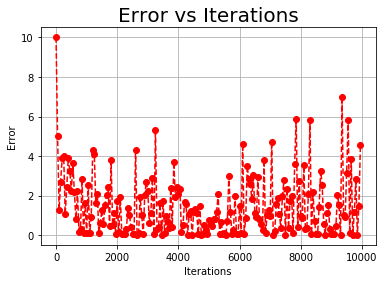

Accuracy Every 50 Iterations : [0.16       0.20142857 0.40785714 0.53       0.61571429 0.51
 0.57428571 0.62142857 0.57071429 0.61928571 0.62928571 0.59
 0.64857143 0.65642857 0.655      0.63642857 0.53285714 0.64357143
 0.60571429 0.60642857 0.62142857 0.67857143 0.63785714 0.65642857
 0.68       0.68214286 0.67071429 0.64214286 0.62571429 0.62285714
 0.67785714 0.65       0.66857143 0.63285714 0.67357143 0.68928571
 0.67428571 0.625      0.65785714 0.68357143 0.62714286 0.66714286
 0.67214286 0.69       0.65142857 0.66214286 0.64928571 0.63142857
 0.63214286 0.68642857 0.69785714 0.675      0.63428571 0.68714286
 0.63071429 0.63714286 0.69071429 0.67071429 0.66857143 0.70142857
 0.52071429 0.68214286 0.70142857 0.69857143 0.66785714 0.68642857
 0.70285714 0.68071429 0.67214286 0.60142857 0.66714286 0.67071429
 0.69285714 0.69571429 0.68142857 0.67928571 0.66214286 0.67857143
 0.69357143 0.62071429 0.69642857 0.68857143 0.64285714 0.67857143
 0.65857143 0.65928571 0.68357143 0.7021428

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy vs Iterations')

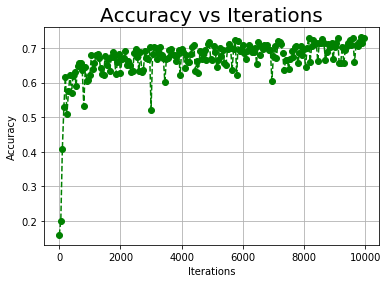

Loss After completing training : 4.55300561965364
Accuracy After completing training : 0.7278571428571429

Loss After completing testing : [[0.16028536]]
Accuracy After completing testing : 0.71
For learning rate = 0.1
Output Layer Weights :
 [[-3.69645928  1.05799981 -5.53865748  3.25725116 -2.78489012  4.39688554
   0.67334449  1.32404998]
 [-5.49500465  4.95159839  3.32457711  0.78119824 -1.08746094 -2.31448984
   0.65585221 -4.23264624]
 [-0.54316592 -1.85368522 -0.59006598  2.77540223  0.29467213 -2.05900781
  -3.49002121  3.07586289]
 [-0.26288332 -3.61253054  3.40867805 -1.84334503  0.21924118 -0.97638849
  -2.30936157 -0.10068404]
 [ 0.42363293 -4.66456456  1.53563978 -0.86623246 -0.96206849 -0.92485834
   3.74349455 -3.01461691]
 [ 1.28416447 -2.92306109 -0.73095596  0.94255979 -3.5183705  -0.58444408
  -3.37491217 -3.56530763]
 [-1.02670206  2.33085361 -2.91305027 -3.96319516 -2.25677963 -3.47590226
   0.02672149 -0.107963  ]
 [-4.88777824 -5.1580775   0.74054195  0.91502313 

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error vs Iterations')

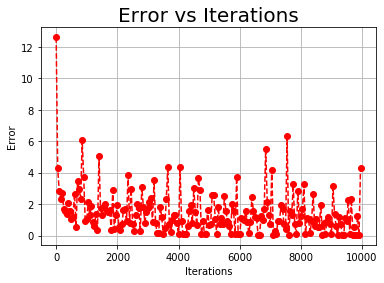

Accuracy Every 50 Iterations : [0.09857143 0.24285714 0.42071429 0.35785714 0.40714286 0.50071429
 0.56428571 0.55214286 0.65857143 0.59214286 0.48785714 0.65357143
 0.64428571 0.65785714 0.67       0.65785714 0.66571429 0.66928571
 0.68357143 0.65785714 0.63928571 0.65928571 0.66071429 0.66714286
 0.68714286 0.66428571 0.66071429 0.675      0.67071429 0.66
 0.67928571 0.68214286 0.67357143 0.68428571 0.70357143 0.68857143
 0.69214286 0.67857143 0.68571429 0.69142857 0.69071429 0.68285714
 0.68642857 0.695      0.67857143 0.66928571 0.68785714 0.67714286
 0.68714286 0.69714286 0.67928571 0.67571429 0.68285714 0.69285714
 0.67714286 0.69357143 0.69357143 0.68214286 0.68142857 0.69285714
 0.69285714 0.68785714 0.69357143 0.695      0.68785714 0.70857143
 0.67       0.7        0.70142857 0.69857143 0.64571429 0.68214286
 0.68285714 0.69357143 0.70571429 0.64857143 0.68071429 0.70642857
 0.71       0.69       0.69428571 0.66714286 0.69357143 0.64071429
 0.69285714 0.71285714 0.70357143 0.7

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy vs Iterations')

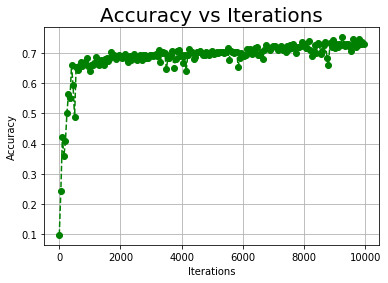

Loss After completing training : 4.324954099357725
Accuracy After completing training : 0.7278571428571429

Loss After completing testing : [[0.9012386]]
Accuracy After completing testing : 0.73
For learning rate = 0.01
Output Layer Weights :
 [[ 1.59498217  1.83874926 -2.2421258  -0.26088687 -3.2001277   0.52049079
   0.82761446 -1.76394761]
 [-1.94660738 -1.65580265 -1.50248648  0.94080094 -2.69931722 -0.6339254
   0.55281268  0.83673298]
 [-0.41130339 -2.31906713  1.28382512 -0.83490465 -0.36963376  1.47627631
  -1.10759598 -3.12745562]
 [-1.52747334 -1.98823892  1.54288908 -0.62964515  0.33937163 -0.53493011
  -0.52425916  0.05538344]
 [-0.863304   -1.37875362 -0.71199485  1.34080363  0.15310454 -3.04942113
   0.73320877  0.38259732]
 [ 0.0147356  -1.51999653  1.03546072 -1.77483716 -0.08375217 -1.4868104
   1.60746464 -1.49187717]
 [ 0.25442185  1.06768257 -2.79435864 -0.59178761  1.20096389  0.84950167
  -3.91696256 -1.93211989]
 [-1.63173262 -1.46232524 -1.36966767  1.49320374 -

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error vs Iterations')

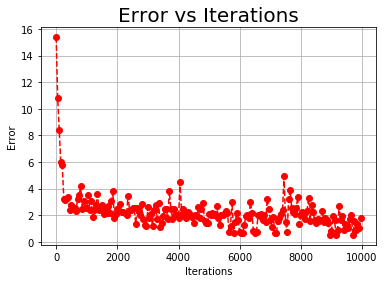

Accuracy Every 50 Iterations : [0.03       0.01357143 0.00785714 0.08571429 0.13285714 0.15142857
 0.15071429 0.17357143 0.20428571 0.16142857 0.20928571 0.23785714
 0.24785714 0.20071429 0.32071429 0.33357143 0.34785714 0.29785714
 0.27357143 0.33928571 0.36857143 0.35428571 0.325      0.33928571
 0.44785714 0.41571429 0.46428571 0.43785714 0.49       0.47071429
 0.46857143 0.52071429 0.46785714 0.46857143 0.47357143 0.50857143
 0.48428571 0.48571429 0.52571429 0.51928571 0.495      0.45
 0.45642857 0.46785714 0.51285714 0.545      0.46285714 0.48357143
 0.44428571 0.46928571 0.44214286 0.47357143 0.55857143 0.56785714
 0.56285714 0.56714286 0.565      0.56071429 0.54928571 0.55928571
 0.565      0.55714286 0.56285714 0.56642857 0.53928571 0.51357143
 0.50857143 0.52857143 0.53428571 0.58071429 0.58928571 0.6
 0.58714286 0.54928571 0.555      0.56928571 0.60642857 0.60142857
 0.64357143 0.64357143 0.60928571 0.63714286 0.63714286 0.64285714
 0.64428571 0.62928571 0.61       0.615     

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy vs Iterations')

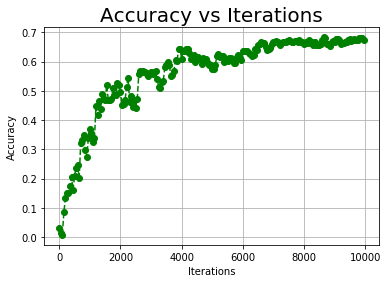

Loss After completing training : 1.7599884641089159
Accuracy After completing training : 0.6742857142857143

Loss After completing testing : [[1.51134862]]
Accuracy After completing testing : 0.6983333333333334


In [157]:
for i in alpha:
    W1,b1,W,b,error_50iteration,accuracy_50iteration,y_trian_pred = stochastic_GD_single(x_train,y_train,i,10000,8)
    
    print("For learning rate = {}".format(i))
    
    #Print learned weights
    print("Output Layer Weights :\n {} ".format(W))
    print("Output Layer Bias :\n {} ".format(b))
    print("Hidden Layer Weights :\n {} ".format(W1))
    print("Hidden Layer Bias :\n {} ".format(b1))
    
    #print and plot error every 50 iterations
    error_50iteration = np.array(error_50iteration).reshape(len(error_50iteration))
    print('Error Every 50 Iterations : {}'.format(error_50iteration))
    iterations = [50*i for i in range(len(error_50iteration))]
    plt.figure(1)
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title("Error vs Iterations",fontsize = 20)
    plt.plot(iterations,error_50iteration,color='red',linestyle="--",marker='o')
    plt.grid(True)
    plt.show()
    
    # print and plot accuracy every 50 iterations
    accuracy_50iteration = np.array(accuracy_50iteration).reshape(len(accuracy_50iteration))
    print('Accuracy Every 50 Iterations : {}'.format(accuracy_50iteration))
    plt.figure(2)
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs Iterations",fontsize = 20)
    plt.plot(iterations,accuracy_50iteration,color='green',linestyle="--",marker='o')
    plt.grid(True)
    plt.show()
    
    
    #overall loss and accuracy
    print("Loss After completing training : {}".format(error_50iteration[-1]))
    print("Accuracy After completing training : {}".format(accuracy_50iteration[-1]))
    print("")

    #testing
    one_hot_y_test = np.zeros((y_test.size,y_test.max()+1))
    one_hot_y_test[np.arange(y_test.size),y_test]=1
    one_hot_y_test = one_hot_y_test[:,1:]

    #print loss after testing
    Xp = list()
    Yp = list()
    random_n = random.randint(0,x_test.shape[0]-1)
    Xp.append(x_test[random_n])
    Yp.append(one_hot_y_test[random_n])
    Xp = np.array(Xp) 
    Yp = np.array(Yp)

    #affine transformation
    Z1 = Xp.dot(W1.T) + b1 
    A1 = sigmoid(Z1) 
    Z2 = A1.dot(W.T) + b 
    A2 = sigmoid(Z2) 
    print("Loss After completing testing : {}".format((-1*Yp).dot(np.log(A2.T)) - (1-Yp).dot(np.log(1-A2.T))))

    #print loss after testing  
    pred_one_hot_y_test = sigmoid(((sigmoid((x_test.dot(W1.T)) + b1)).dot(W.T)) + b)
    y_test_pred = list()
    for row in range(pred_one_hot_y_test.shape[0]):
        threshold = 0
        highest_column = 0
        for column in range(pred_one_hot_y_test.shape[1]):
            if(pred_one_hot_y_test[row][column] > threshold):
                threshold = pred_one_hot_y_test[row][column]
                highest_column = column
        y_test_pred.append(highest_column + 1)

    correct = 0
    for n in range(len(y_test)):
        if y_test_pred[n] == y_test[n]:
            correct = correct + 1
    accuracy_test = correct / len(y_test)

    print("Accuracy After completing testing : {}".format(accuracy_test))
    
    

## Two Hidden Layer Artificial Neural Network


In [ ]:
def sftmx(z):
    return np.exp(z) / np.sum(np.exp(z), axis=0)

In [158]:
def stochastic_GD_double(X,Y,learning_rate,epochs,layer1_hidden_units=8 ,layer2_hidden_units=8):

    y_org = Y

    #one hot encoding
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    Y = one_hot_Y[:,1:]

    #random weight initialization
    #6 input units
    W1 = np.random.randn(layer1_hidden_units,6) 
    b1 = np.random.randn(1,layer1_hidden_units)
    W2 = np.random.randn(layer2_hidden_units,layer1_hidden_units)
    b2 = np.random.randn(1,layer2_hidden_units)
    #10 output units
    W = np.random.randn(10,layer2_hidden_units) 
    b = np.random.randn(1,10) 

    error_every_50_iteration_list = list()
    accuracy_every_50_iteration_list = list()

    for i in range(epochs):
     
        Xp = list()
        Yp = list()
        random_no = random.randint(0,X.shape[0]-1)
        Xp.append(X[random_no])
        Yp.append(Y[random_no])
        #converting list into numpy array 
        Xp = np.array(Xp) 
        Yp = np.array(Yp) 

        #forward propagation
        #affine transformation
        Z1 = Xp.dot(W1.T) + b1 
        A1 = sigmoid(Z1) 
        Z2 = A1.dot(W2.T) + b2 
        A2 = sigmoid(Z2)
        Z3 = A2.dot(W.T) + b 
        A3 = sigmoid(Z3) 

        #backward propagation
        db = (-1)*(Yp/A3)*(sigmoid_derivative(Z3)) + ((1-Yp)/(1-A3))*(sigmoid_derivative(Z3)) 
        dW = (db.T).dot(A2)
        db2 = (db.dot(W))*sigmoid_derivative(Z2)
        dW2 = (db2.T).dot(A1)
        db1 = (db2.dot(W2))*sigmoid_derivative(Z1)
        dW1 = (db1.T).dot(Xp)
        
        #update weights
        W = W - (learning_rate)*(dW)
        b = b - (learning_rate)*(db)
        W2 = W2 - (learning_rate)*(dW2)
        b2 = b2 - (learning_rate)*(db2)
        W1 = W1 - (learning_rate)*(dW1)
        b1 = b1 - (learning_rate)*(db1)

        #error and accuracy every 50 interval
        #calculate error
        #cross entropy
        error = (-1*Yp).dot(np.log(A3.T)) - (1-Yp).dot(np.log(1-A3.T))
    
        #calculate accuracy
        pred_one_hot_Y = sigmoid((sigmoid((sigmoid(X.dot(W1.T) + b1)).dot(W2.T) + b2)).dot(W.T) + b)
        y_pred = list()
        for row in range(pred_one_hot_Y.shape[0]):
            threshold = 0
            highest_column = 0
            for column in range(pred_one_hot_Y.shape[1]):
                if(pred_one_hot_Y[row][column] > threshold):
                    threshold = pred_one_hot_Y[row][column]
                    highest_column = column
            y_pred.append(highest_column + 1)
        correct = 0
        for k in range(len(y_org)):
            if y_org[k] == y_pred[k]:
                correct = correct + 1
        accuracy = correct / len(y_org)
    
        if(i%50 == 0):
            error_every_50_iteration_list.append(error)
            accuracy_every_50_iteration_list.append(accuracy)

    return W2,b2,W1,b1,W,b,error_every_50_iteration_list,accuracy_every_50_iteration_list,y_pred


In [159]:
alpha = [0.5, 0.1, 0.01]

For learning rate 0.5
Output Layer Weights :
 [[-5.03398336 -3.79408164  5.36763345  5.092558   -2.52260705  2.10083573
  -2.95551806 -6.40475723]
 [-0.8424258  -0.46941604 -5.07269122 -4.1036124  -3.86833108  5.50898476
   1.41998605 -5.45530715]
 [-0.43649911 -3.14402039 -0.7610889  -2.47171889  1.19765633 -3.18884142
  -4.14191093 -3.20706041]
 [ 1.50498773  0.60020186 -2.01769026 -4.65630718 -0.24672787 -4.31991812
  -0.23054107 -2.29387952]
 [ 2.17114079 -1.45124642 -3.65557368 -4.70868015 -3.77238047 -1.4952333
  -1.05728488 -1.68140801]
 [ 0.130945    1.97149545 -0.19144532 -4.64469264  2.87636904 -5.00603678
  -3.25215976 -0.69506498]
 [-1.48370192 -4.24528236 -2.83995924  0.05584035 -2.45979677  1.87360426
  -3.20492807  4.25920802]
 [-3.05625907 -2.48197454 -3.84352909 -3.1429589  -2.96004196 -6.27834631
   2.27431533 -4.51316026]
 [-4.56151162  7.6663084   2.2166745   1.38362168 -3.49200898 -2.65921576
  -3.14429289  2.52440115]
 [-2.82343679 -3.44319458 -2.7043856  -0.26230

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error vs Iterations')

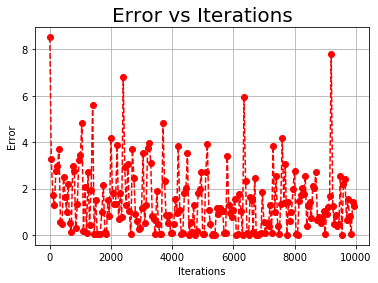

Accuracy Every 50 Iterations : [0.09785714 0.10714286 0.17857143 0.31714286 0.48571429 0.46928571
 0.45642857 0.49357143 0.60214286 0.50071429 0.59428571 0.63857143
 0.59714286 0.63357143 0.55785714 0.59071429 0.58571429 0.57785714
 0.58857143 0.595      0.61642857 0.64857143 0.53714286 0.60857143
 0.64142857 0.60642857 0.54       0.65642857 0.60928571 0.64285714
 0.60357143 0.63642857 0.67642857 0.64714286 0.60857143 0.57928571
 0.59571429 0.64142857 0.66       0.59571429 0.595      0.56142857
 0.63857143 0.68214286 0.66071429 0.60142857 0.66571429 0.60214286
 0.54       0.59214286 0.57428571 0.64       0.49428571 0.64071429
 0.66       0.66357143 0.67642857 0.69714286 0.68285714 0.68357143
 0.67285714 0.60714286 0.67714286 0.68357143 0.66071429 0.67214286
 0.61       0.63142857 0.68       0.67357143 0.67642857 0.61571429
 0.66071429 0.61785714 0.58571429 0.65857143 0.66214286 0.67642857
 0.65785714 0.67785714 0.64214286 0.60857143 0.67071429 0.69571429
 0.66785714 0.62214286 0.588571

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy vs Iterations')

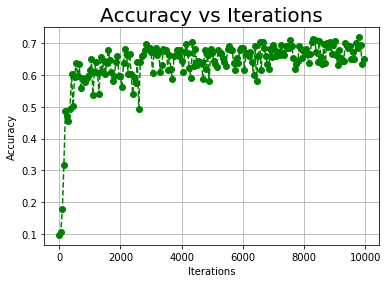

Loss After completing training : 1.2671600712255102
Accuracy After completing training : 0.6492857142857142

Loss After completing testing : [[3.54156918]]
Accuracy After completing testing : 0.6216666666666667
For learning rate 0.1
Output Layer Weights :
 [[ 0.04669458 -2.45384767 -4.00306426 -0.91877304  6.32002758 -4.32272383
   3.6204213   1.6852211 ]
 [-3.67075493 -2.49695909 -2.47391629 -0.20599298  5.38070068  4.68675515
  -3.75999687 -2.0833472 ]
 [ 3.47261127 -2.35237851 -4.44735967 -1.43386048 -0.66260467 -1.43608587
  -2.54057442  2.73509738]
 [ 1.62820923  1.60910482 -1.63344508 -3.41092112 -1.58762906  1.36545165
  -2.03707419 -0.67947798]
 [-2.00927116 -0.52102609 -1.76602102 -2.63539506 -4.33045047  5.40732243
  -1.99286074  0.57266847]
 [ 3.88630952  2.52611841 -3.3609097  -1.30846456 -2.41147014 -2.67408458
  -2.94151214  0.24633045]
 [-4.2420452  -2.72963185 -0.21059169  0.58567132 -3.28915146 -2.63307759
  -2.31865342  0.3142616 ]
 [ 2.67531367 -4.29285012 -2.8079953

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error vs Iterations')

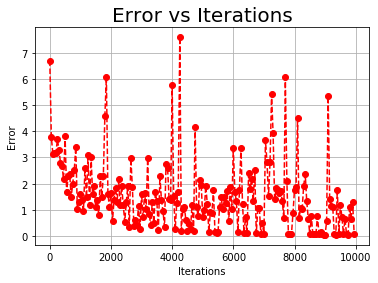

Accuracy Every 50 Iterations : [0.09785714 0.12428571 0.15642857 0.10571429 0.31714286 0.29142857
 0.36428571 0.33642857 0.41       0.39071429 0.46214286 0.47214286
 0.49142857 0.46714286 0.45571429 0.55571429 0.55428571 0.43928571
 0.52857143 0.55285714 0.55       0.46285714 0.46357143 0.48071429
 0.555      0.49       0.52642857 0.50214286 0.57214286 0.53
 0.61       0.56571429 0.52928571 0.59857143 0.52285714 0.57357143
 0.57642857 0.59571429 0.53357143 0.61642857 0.55857143 0.60928571
 0.56428571 0.57428571 0.60785714 0.63142857 0.60571429 0.595
 0.65642857 0.62071429 0.60857143 0.64285714 0.62214286 0.61571429
 0.66142857 0.635      0.64428571 0.63357143 0.65142857 0.62714286
 0.615      0.67571429 0.63285714 0.63357143 0.63714286 0.64071429
 0.64071429 0.69357143 0.645      0.68857143 0.675      0.66714286
 0.69428571 0.69       0.68428571 0.61357143 0.67357143 0.63428571
 0.68       0.69285714 0.685      0.67785714 0.68       0.66285714
 0.69       0.66857143 0.68571429 0.678571

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy vs Iterations')

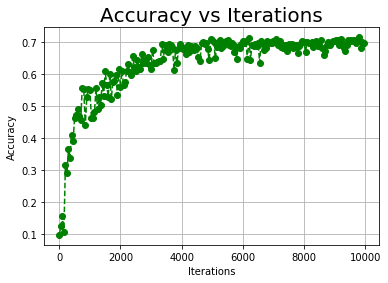

Loss After completing training : 0.06692880968829029
Accuracy After completing training : 0.6957142857142857

Loss After completing testing : [[1.93401158]]
Accuracy After completing testing : 0.645
For learning rate 0.01
Output Layer Weights :
 [[-0.37042524  2.16659957  0.13441858 -3.70036074 -0.37557146 -0.8997115
   1.42688798 -3.81845838]
 [-0.8762605  -2.4696757   1.98789156 -2.37057362 -0.67944495 -0.4020417
  -0.81804355  3.29708133]
 [-1.39628685  0.13666088 -1.65226982  0.40018263 -0.97905252  0.56278216
  -3.75786961  0.53065888]
 [ 2.14999644  0.25581112 -1.84712661  1.28174106 -0.8453904   0.17233648
  -0.16564352 -1.06950937]
 [ 1.52241861 -1.19131253 -1.67037298 -0.94001876 -0.01125001  0.45736833
   0.80594261  0.35157342]
 [-1.22364533  0.09005645 -3.1411993   0.68125388 -0.70683973  0.62283603
  -0.58051076  0.6782085 ]
 [-0.91805442 -0.60161745  0.1501348   0.51994859  0.53031676 -2.55823982
   0.04108703 -0.57599073]
 [ 0.10164247 -0.9685237   1.00865472 -2.30976757

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Error')

Text(0.5, 1.0, 'Error vs Iterations')

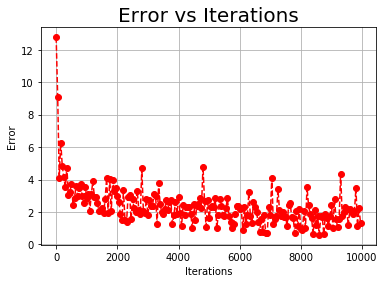

Accuracy Every 50 Iterations : [0.10642857 0.10785714 0.14071429 0.135      0.16428571 0.28857143
 0.26714286 0.30571429 0.31428571 0.34214286 0.38928571 0.34428571
 0.36142857 0.35214286 0.33785714 0.4        0.385      0.39642857
 0.40857143 0.37714286 0.375      0.39642857 0.37714286 0.375
 0.36071429 0.38928571 0.40071429 0.39642857 0.38214286 0.35642857
 0.36857143 0.31928571 0.33642857 0.41       0.44071429 0.42428571
 0.43928571 0.43714286 0.41928571 0.485      0.465      0.49
 0.48       0.45214286 0.44857143 0.42285714 0.42285714 0.42
 0.44571429 0.49071429 0.50357143 0.51357143 0.48357143 0.48357143
 0.51       0.51285714 0.54928571 0.55       0.53357143 0.52571429
 0.56071429 0.53785714 0.60571429 0.60285714 0.54071429 0.53
 0.54285714 0.53285714 0.54285714 0.55571429 0.58       0.58785714
 0.60928571 0.57571429 0.595      0.61214286 0.62571429 0.585
 0.58428571 0.56857143 0.57142857 0.56428571 0.59428571 0.57785714
 0.575      0.62       0.61214286 0.63       0.63214286 0.6

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Iterations')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy vs Iterations')

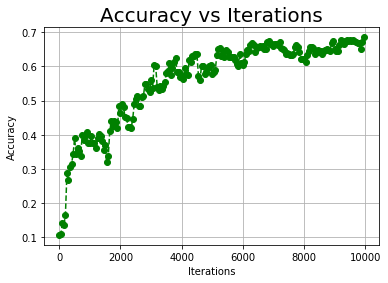

Loss After completing training : 1.3283040588713537
Accuracy After completing training : 0.6857142857142857

Loss After completing testing : [[1.54255114]]
Accuracy After completing testing : 0.6583333333333333


In [160]:
for i in alpha:
    W2,b2,W1,b1,W,b,error_every_50_iteration,accuracy_every_50_iteration,y_trian_pred = stochastic_GD_double(x_train,y_train,i,10000)
    
    print("For learning rate {}".format(i))
    #Print learned weights
    print("Output Layer Weights :\n {} ".format(W))
    print("Output Layer Bias : \n {} ".format(b))
    print("Hidden Layer2 Weights : \n {} ".format(W2))
    print("Hidden Layer2 Bias : \n{} ".format(b2))
    print("Hidden Layer1 Weights :\n {} ".format(W1))
    print("Hidden Layer1 Bias : \n{} ".format(b1))
    
    #print and plot error every 50 iterations
    error_every_50_iteration = np.array(error_every_50_iteration).reshape(len(error_every_50_iteration))
    print('Error Every 50 Iterations : {}'.format(error_every_50_iteration))
    iterations = [50*i for i in range(len(error_every_50_iteration))]
    plt.figure(1)
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.title("Error vs Iterations",fontsize = 20)
    plt.plot(iterations,error_every_50_iteration,color='red',linestyle="--",marker='o')
    plt.grid(True)
    plt.show()
        
    # print and plot accuracy every 50 iterations
    accuracy_every_50_iteration = np.array(accuracy_every_50_iteration).reshape(len(accuracy_every_50_iteration))
    print('Accuracy Every 50 Iterations : {}'.format(accuracy_every_50_iteration))
    plt.figure(2)
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs Iterations",fontsize = 20)
    plt.plot(iterations,accuracy_every_50_iteration,color='green',linestyle="--",marker='o')
    plt.grid(True)
    plt.show() 
    
    
    
    
    print("Loss After completing training : {}".format(error_every_50_iteration[-1]))
    print("Accuracy After completing training : {}".format(accuracy_every_50_iteration[-1]))
    print("")

    #testing
    one_hot_y_test = np.zeros((y_test.size,y_test.max()+1))
    one_hot_y_test[np.arange(y_test.size),y_test]=1
    one_hot_y_test = one_hot_y_test[:,1:]

    #print loss after testing
    Xp = list()
    Yp = list()
    random_n = random.randint(0,x_test.shape[0]-1)
    Xp.append(x_test[random_n])
    Yp.append(one_hot_y_test[random_n])
    Xp = np.array(Xp) 
    Yp = np.array(Yp)

    #affine transformation
    Z1 = Xp.dot(W1.T) + b1 
    A1 = sigmoid(Z1)
    Z2 = A1.dot(W2.T) + b2 
    A2 = sigmoid(Z2)
    Z3 = A2.dot(W.T) + b 
    A3 = sigmoid(Z3) 
    print("Loss After completing testing : {}".format((-1*Yp).dot(np.log(A3.T)) - (1-Yp).dot(np.log(1-A3.T))))

    #print loss after testing  
    pred_one_hot_y_test = sigmoid((sigmoid((sigmoid(x_test.dot(W1.T) + b1)).dot(W2.T) + b2)).dot(W.T) + b)
    y_test_pred = list()
    for row in range(pred_one_hot_y_test.shape[0]):
        threshold = 0
        highest_column = 0
        for column in range(pred_one_hot_y_test.shape[1]):
            if(pred_one_hot_y_test[row][column] > threshold):
                threshold = pred_one_hot_y_test[row][column]
                highest_column = column
        y_test_pred.append(highest_column + 1)

    correct = 0
    for n in range(len(y_test)):
        if y_test_pred[n] == y_test[n]:
            correct = correct + 1
    accuracy_test = correct / len(y_test)


    print("Accuracy After completing testing : {}".format(accuracy_test))

        